# 0.0. IMPORTS

## 0.1. Libries

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import datetime

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image





## 0.2. Helper Funcions

## 0.3. Loading data

In [2]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'data/store.csv', low_memory=False )

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how= 'left',on = 'Store' )

# 1.0. DESCRIÇÃO DOS DADOS

## 1.1.  Rename Columns


In [3]:
df1 = df_raw.copy()

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday',                           'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

#put snakecase
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

#rename columns
df1.columns = cols_new

In [5]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [6]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of cols: 18


## 1.3.  Data Types

In [7]:
df1['date'] = pd.to_datetime( df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4.  Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5.  Fillout NA

In [9]:
df1['competition_distance'].max()

75860.0

In [10]:
#competition_distance(distância de uma loja concorrente) 
#Assumiremos que quando tem um NA não existe competidor ou esta muito distante.
#Assim substiruiremos por um valor muito maior que o encontrado no dataset(75860m)
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 
                                                                200000.0 if math.isnan( x ) else x)

#competition_open_since_month    
df1['competition_open_since_month'] = df1.apply( lambda x: 
                                                x['date'].month if 
                                                math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1 )       
                                                                                    

#competition_open_since_year   
df1['competition_open_since_year'] = df1.apply( lambda x: 
                                                x['date'].year if 
                                                math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1 )                                                                                     
#promo2_since_week  
df1[ 'promo2_since_week' ] = df1.apply( lambda x: 
                                                x['date'].week if 
                                                math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis = 1) 

#promo2_since_year  
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 ) 

#promo_interval         
month_map = {1:  'Jan', 2:  'Fev', 3:  'Mar', 4:  'Apr', 5:  'May', 6:  'Jun', 7:  'Jul', 8:  'Aug', 9:  'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', }

df1['promo_interval'].fillna(0, inplace = True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )


In [11]:
df1.sample(5).T

,144267,16364,597,395088,886704
store,433,755,598,833,1065
day_of_week,2,5,5,2,7
date,2015-03-24 00:00:00,2015-07-17 00:00:00,2015-07-31 00:00:00,2014-07-15 00:00:00,2013-04-28 00:00:00
sales,4714,11530,6675,6797,0
customers,603,886,763,518,0
open,1,1,1,1,0
promo,0,1,1,1,0
state_holiday,0,0,0,0,0
school_holiday,0,1,0,0,0
store_type,a,d,c,d,a


## 1.6. Change Types

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )             
df1['competition_open_since_year'] =  df1['competition_open_since_year'].astype( int )  
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )                    
df1['promo2_since_year'] =  df1['promo2_since_year'].astype( int )                     

## 1.7. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'])


### 1.7.1 Numerical Atributes

In [15]:
#Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T



In [16]:
# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2 Categorical Atributes

In [17]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

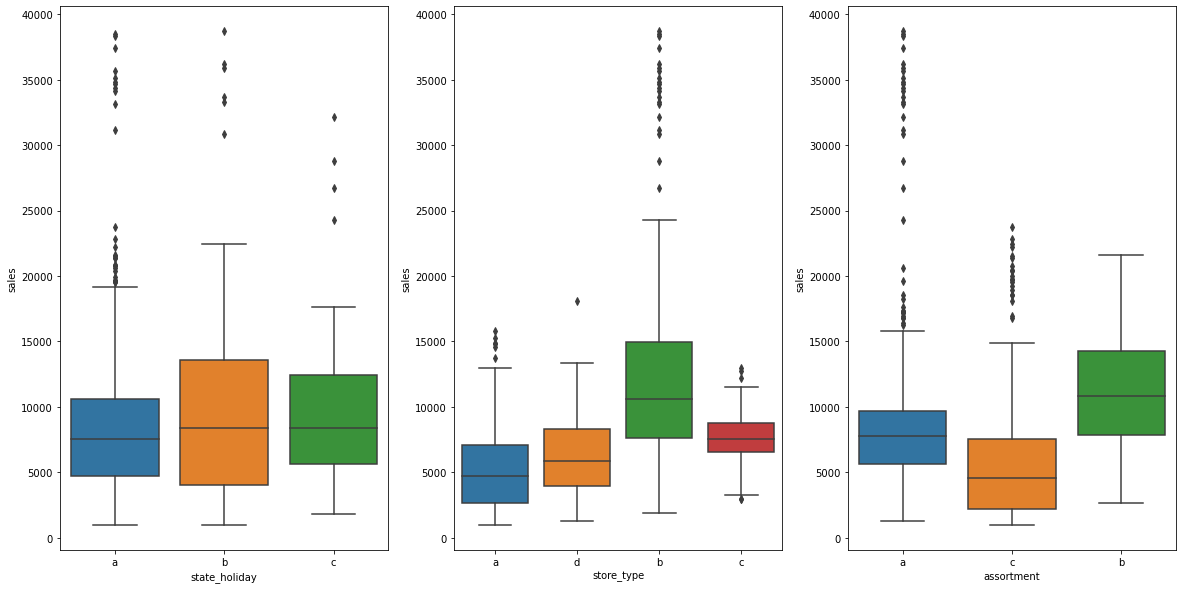

In [18]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux, width = 0.8 ).figure.set_size_inches(20,10)

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux, width = 0.8 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux, width = 0.8 )







# 2.0. FEATURE ENGINEERING

In [19]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

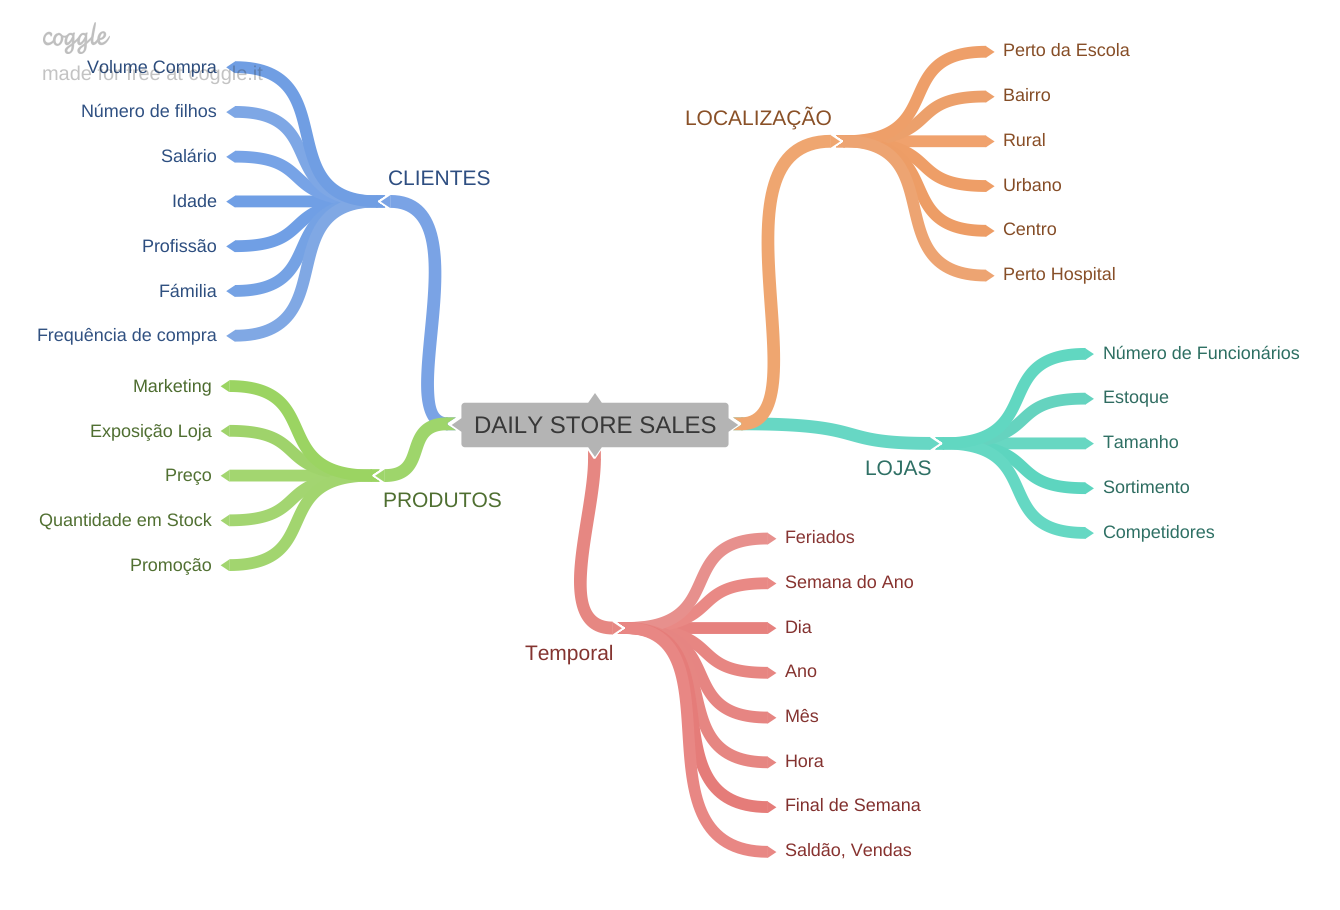

In [20]:
Image( 'img/mindmaphypothesis.png' )

## 2.2.  Criação das Hipóteses

### 2.2.1. Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.



### 2.2.2. Hipoteses Produto

**1.** Lojas que investem mais em Marketing devriam vender mais

**2.** Lojas maior exposição do produto deveriam vender mais. 

**3.** Lojas com podutos com preço menor deveriam vender mais.

**4.** Lojas promoções mais agressivas(descontos maiores), deveriam vender mais

**5.** Lojas com promoção ativas por mais tempo deveriam vender mais. 

**6.** Lojas com mais dias de promoção deveriam vender mais. 

**7.** Lojas com mais promoção consecutivas deveriam vender mais. 



### 2.2.1. Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.


## 2.3.  Criação Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoção ativas por mais tempo deveriam vender mais. 

**5.** Lojas com mais dias de promoção deveriam vender mais. 

**6.** Lojas com mais promoção consecutivas deveriam vender mais. 

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.



## 2.4.  Feature Engineering

In [21]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )





#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2[ 'competition_time_month' ]=(( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

#promo since
df2['promo_since'] = df2[ 'promo2_since_year' ].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x : datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days = 7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7).apply( lambda x: x.days ).astype( int )

#assortment
#describes: a = basic, b = extra, c = extended

df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extend' )

#state holiday
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x == 'c'  else 'regular_day')


/tmp/ipykernel_4248/3001535392.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [22]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. FILTRAGEM DE VARIÁVEIS

In [23]:
df3 = df2.copy()

In [24]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das Linhas


In [25]:
df3 =df3[( df3['open'] != 0 ) & ( df3['sales'] > 0 )]

## 3.2  Seleção de Colunas

In [26]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )


In [27]:
df3.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extend,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 4.0. ANALISE EXPLORATÓRIA DOS DADOS

In [37]:
df4 = df3.copy()

## 4.1 Analise Univariada


### 4.1.1. Response Variable

/home/lucasas/anaconda3/envs/dsemproducao/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


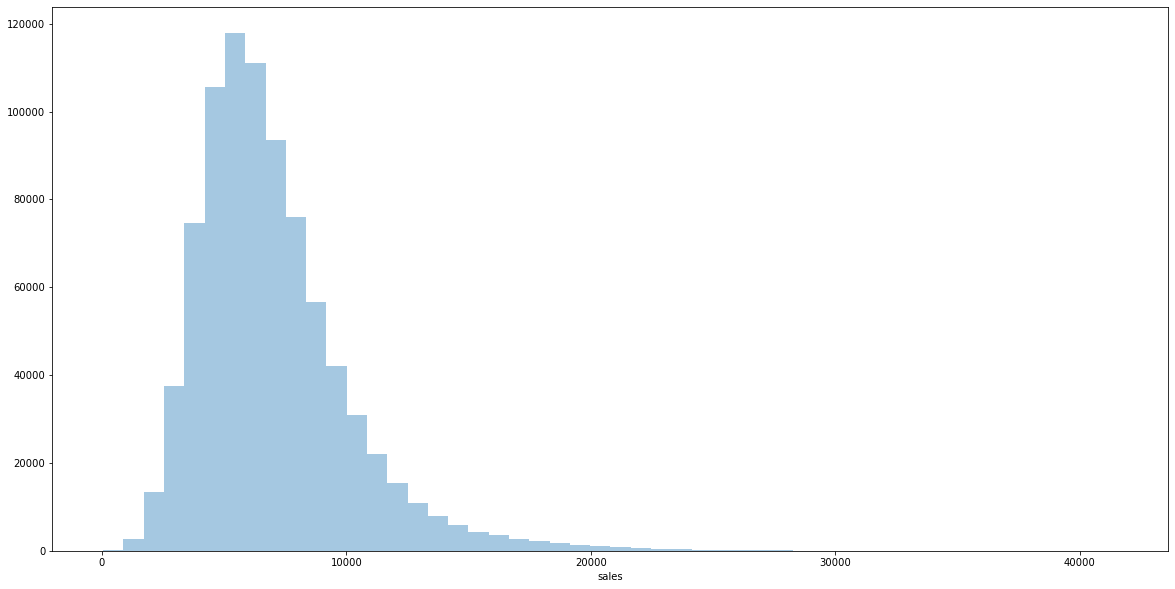

In [29]:
sns.distplot( (df4['sales'] ), kde = False).figure.set_size_inches(20,10)

### 4.1.2 Numerical Variable

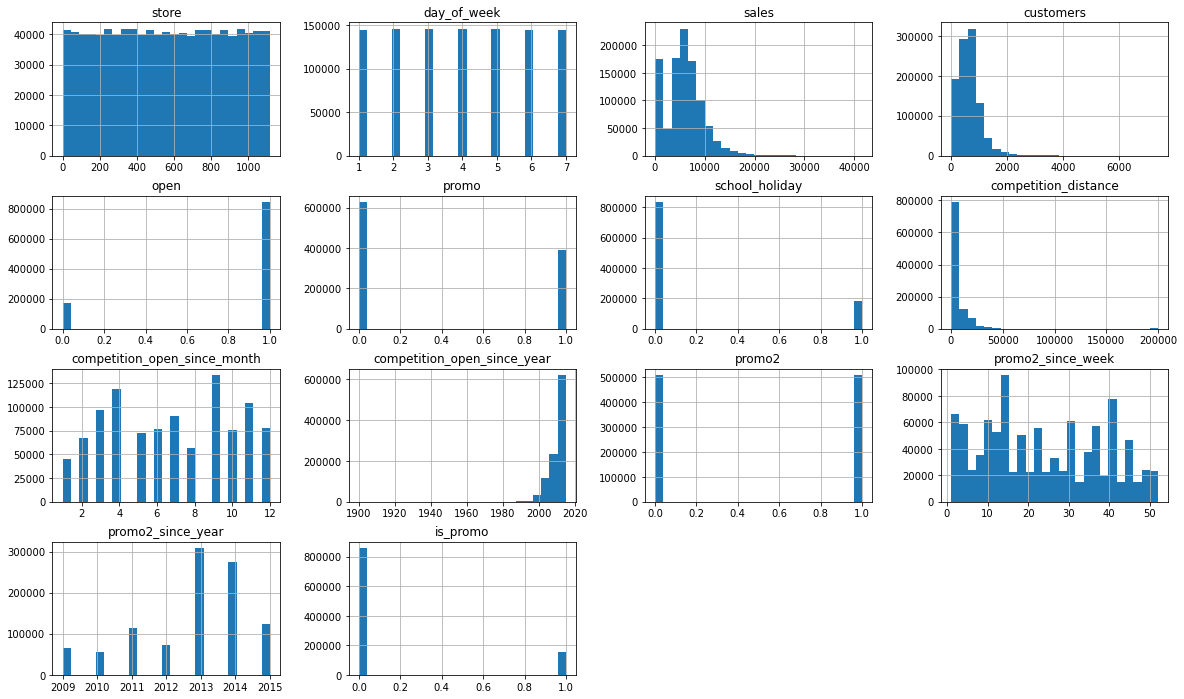

In [30]:
num_attributes.hist(bins = 25, figsize=(20,12));

Entendimento de cada gráfico:
- store
- day_of_week(Dias da semana, numero de vendas) = Não ha uma grande diferença de vendas nos dias da semana, praticamente possuem o mesmo comportamento, não importa o dia. 

- sales
- customers
- open
- promo
- school_holiday

- competition_distance(distancia da loja para os competidores) = O gráfico possui uma grande concentração nas distâncias menores, indicando que a maioria das lojas possuem competidores próximos.

- competition_open_since_month(lojas competidoras aberas a quantos meses) = temos um comportamento de bastante lojas competidoras abrindo no mês 4, depois a uma queda, voltando a ter muitas lojas abertas no mes 9.

- promo2_since_week
- promo2_since_year
- is_promo
- competition_open_since_year
- promo2


In [31]:
num_attributes

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6,2014,1,31,2013,1
1017205,1112,2,0,0,0,0,1,1880.0,4,2006,0,1,2013,0
1017206,1113,2,0,0,0,0,1,9260.0,1,2013,0,1,2013,0
1017207,1114,2,0,0,0,0,1,870.0,1,2013,0,1,2013,0


### 4.1.3. Categorical Variable

In [32]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public holiday
129424    Easter holiday
241126         Christmas
Name: state_holiday, dtype: object

In [33]:
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

In [34]:
df4['assortment'].drop_duplicates()

0       basic
3      extend
258     extra
Name: assortment, dtype: object

/home/lucasas/anaconda3/envs/dsemproducao/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucasas/anaconda3/envs/dsemproducao/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucasas/anaconda3/envs/dsemproducao/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

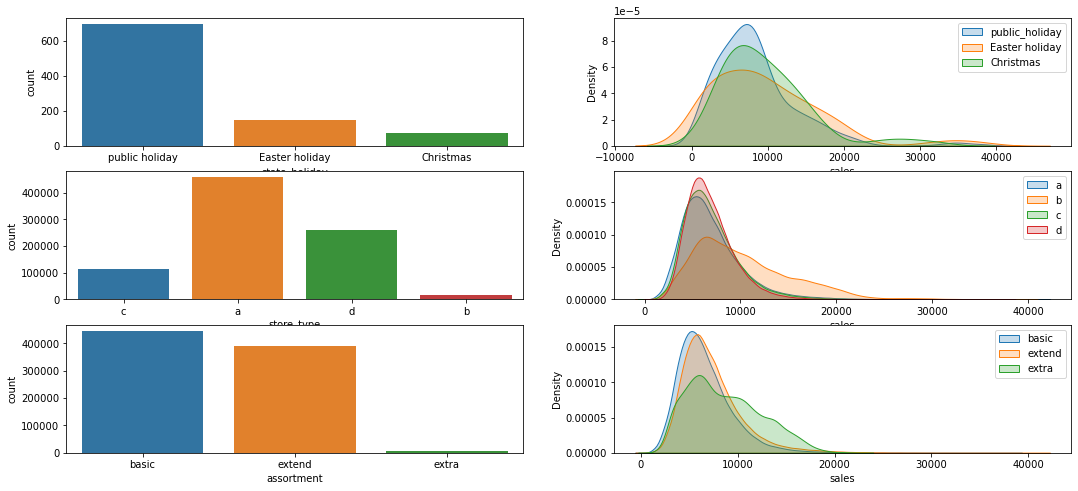

In [35]:
# state_holiday
plt.subplot( 3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] ).figure.set_size_inches(15,8);

plt.subplot( 3, 2, 2)
sns.kdeplot( df4[df4['state_holiday']== 'public holiday']['sales'],  label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday']== 'Easter holiday']['sales'], label='Easter holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday']== 'Christmas']['sales'],  label='Christmas', shade=True )
plt.legend()

# store_type
plt.subplot( 3, 2, 3)
sns.countplot( df4['store_type'] ).figure.set_size_inches(18,8);

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['store_type']== 'a']['sales'],  label='a', shade=True )
sns.kdeplot( df4[df4['store_type']== 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type']== 'c']['sales'],  label='c', shade=True )
sns.kdeplot( df4[df4['store_type']== 'd']['sales'],  label='d', shade=True )
plt.legend()


# assortment
plt.subplot( 3, 2, 5)
sns.countplot( df4['assortment'] ).figure.set_size_inches(18,8);

plt.subplot( 3, 2, 6)
sns.kdeplot( df4[df4['assortment']== 'basic']['sales'],  label='basic', shade=True )
sns.kdeplot( df4[df4['assortment']== 'extend']['sales'], label='extend', shade=True )
sns.kdeplot( df4[df4['assortment']== 'extra']['sales'],  label='extra', shade=True )
plt.legend()

## 4.2. Analise Bivariada

### **H1.** Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com maior MAIOR SORTIMENTO vendem MENOS


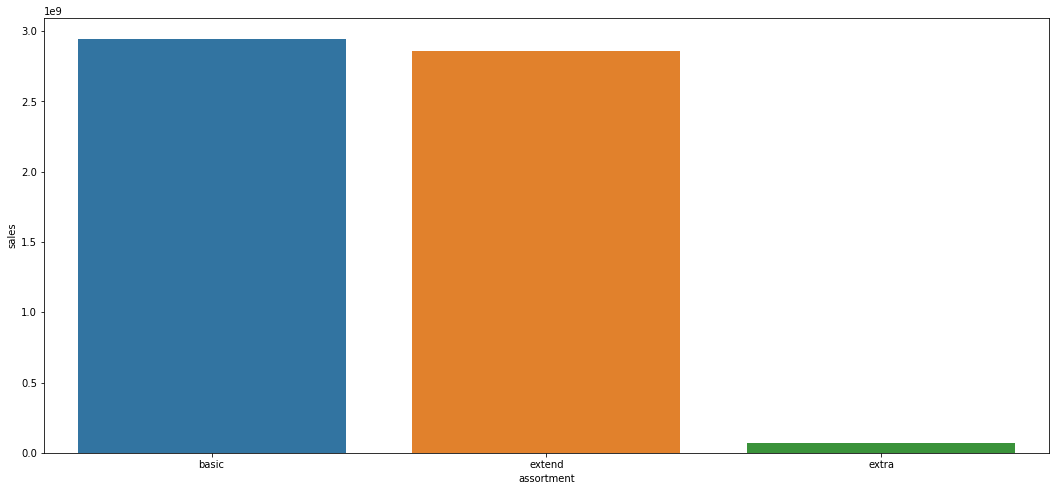

In [41]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot( x='assortment', y = 'sales', data = aux1).figure.set_size_inches(18,8);

In [42]:
aux1


,assortment,sales
0,basic,2945750070
1,extend,2856484241
2,extra,70946312


> Vemos numa primeira observação que na verdade ao contrário, quando maior o assortment, no caso o 'extra', vende menos do que as com do tipo 'basic' ou 'extend'. 

> Para podermos investigar um pouco mais a seguir iremos incluir a variável tempo, para ver qual foi o comportament ao longo do tempo para cada tipo de assortment. 

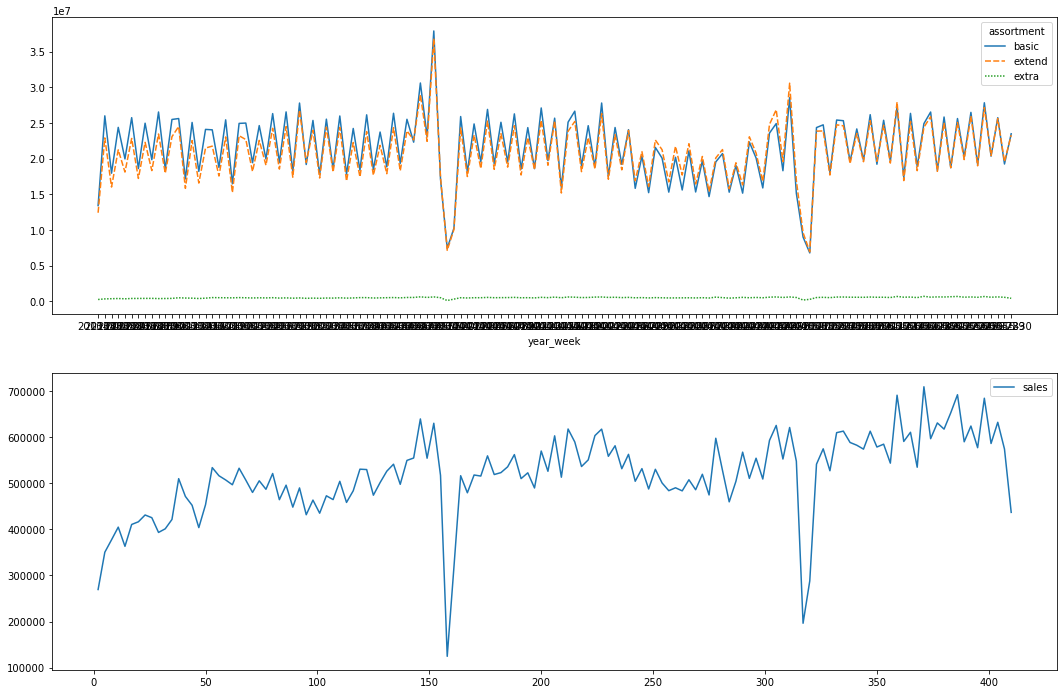

In [107]:
#plot assortment year_week:

aux2 = df4[['year_week', 'assortment','sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
plot_aux2 = aux2.pivot( index= 'year_week', columns='assortment', values = 'sales')
plt.subplot( 2, 1, 1)
sns.lineplot( data=plot_aux2  ).figure.set_size_inches(18,12);


#Plot assortment extra year_week:
aux3 = aux2[aux2['assortment'] == 'extra']
plt.subplot( 2, 1, 2)
sns.lineplot( data=aux3  ).figure.set_size_inches(18,12);


> Mesmo ao longo do tempo, as logas do assortment extra vendem bem menos. Assim podemos considerar a hipotese FALSA

#### h1.2 Considerando a média

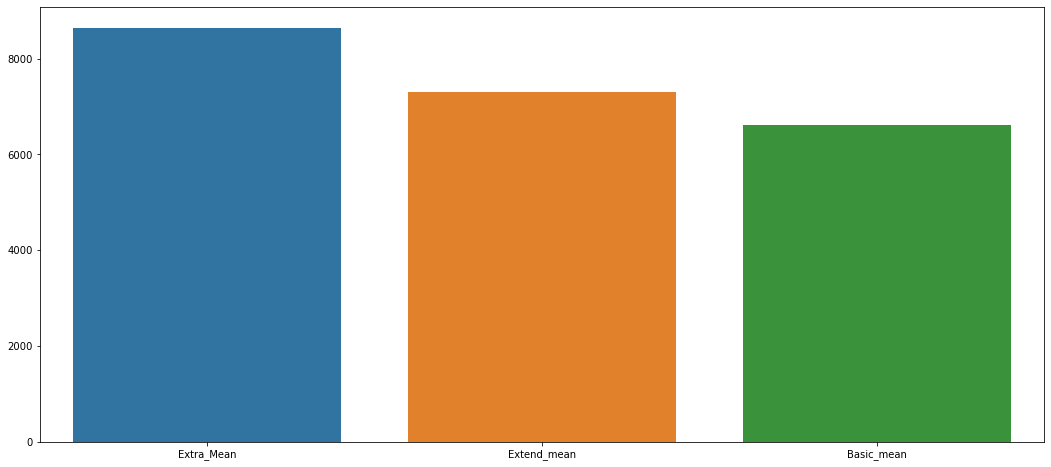

In [84]:
#Na minha visão deveria ser feito com a média, ai ficaria algo do tipo:
media_assortment_extra = round(df4['sales'][df4['assortment'] == 'extra'].mean(), 2)
media_assortment_extend = round(df4['sales'][df4['assortment'] == 'extend'].mean(), 2)
media_assortment_basic = round(df4['sales'][df4['assortment'] == 'basic'].mean(), 2)

d = {'Extra_Mean': [media_assortment_extra], 'Extend_mean': [media_assortment_extend], 'Basic_mean': [media_assortment_basic] }
df_assortment_mean = pd.DataFrame(data=d)
sns.barplot( data = df_assortment_mean ).figure.set_size_inches(18,8);

In [117]:
print('Numero de lojas assortment do tipo extra: ', df4['sales'][df4['assortment'] == 'extra'].shape[0]) 
print('Numero de lojas assortment do tipo extend: ', df4['sales'][df4['assortment'] == 'extend'].shape[0])
print('Numero de lojas assortment do tipo basic: ', df4['sales'][df4['assortment'] == 'basic'].shape[0])

Numero de lojas assortment do tipo extra:  8209
Numero de lojas assortment do tipo extend:  391254
Numero de lojas assortment do tipo basic:  444875


### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS


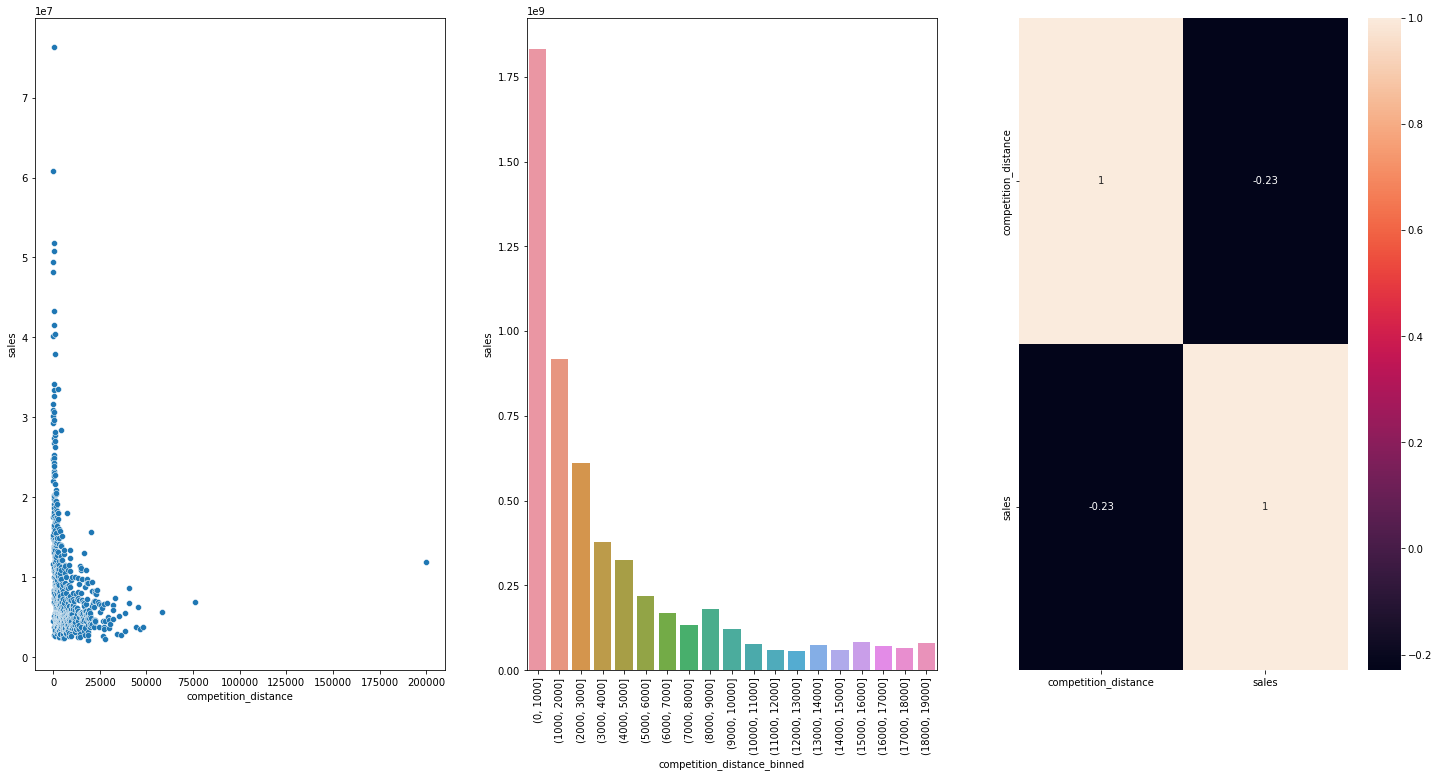

In [169]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1).figure.set_size_inches(25,12)
sns.scatterplot( x = 'competition_distance', y = 'sales', data = aux1 );

bins = list( np.arange( 0, 20000, 1000)  )

aux1[ 'competition_distance_binned' ] = pd.cut( aux1['competition_distance'], bins = bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
plt.subplot( 1, 3, 2)
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation = 90 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot = True);

> Nesta hipótese percebemos que a uma maior concentração no número de vendas quando a distância é menor. Na matriz de correlação temos inclusive uma correlação negatia, assim mais uma vez nossa hipótese é falsa. 

### **H3.** Lojas com competidores à mais tempo deveriam vender mais.
**FALSE** Lojas com COMPETIDORES À MAIS TEMPO vendem MENOS. 

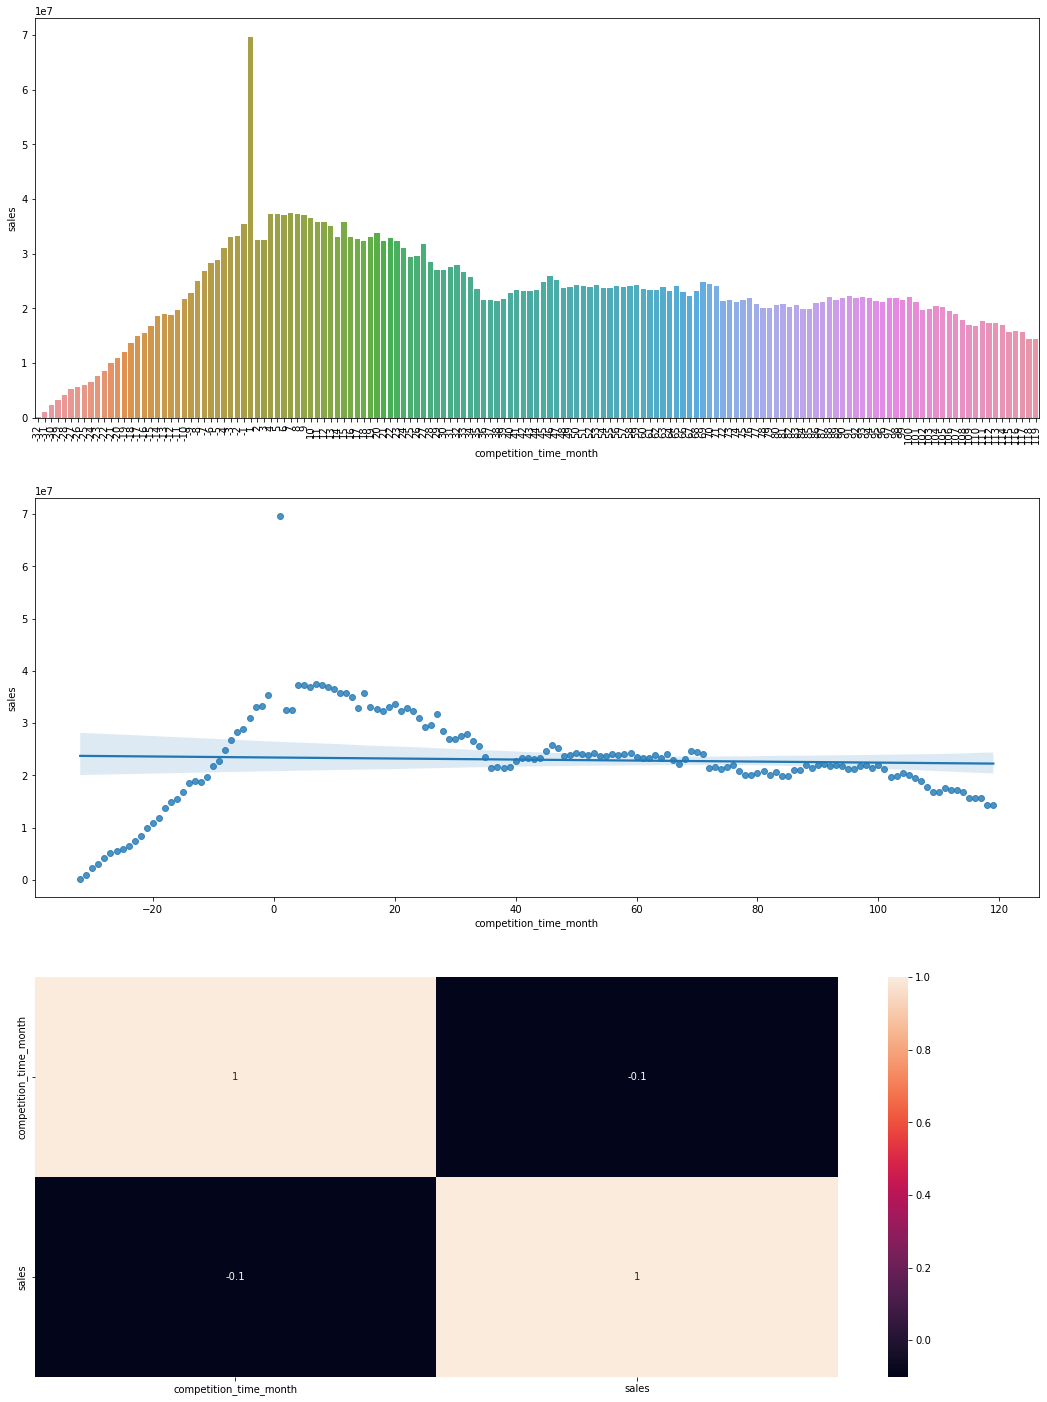

In [198]:
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month' ]!= 0 ) ]

plt.subplot( 3, 1, 1).figure.set_size_inches(18,25);
sns.barplot( x = 'competition_time_month', y = 'sales', data = aux2)
plt.xticks( rotation = 90 );

plt.subplot( 3, 1, 2)
sns.regplot( x = 'competition_time_month', y = 'sales', data = aux2)

plt.subplot(3, 1, 3)
x = sns.heatmap( aux1.corr( method = 'pearson'), annot= True );

> A hipótese esta desvalidada, pois vemos que mesmo que com pouco tempo de abertura a venda caia, no decorrer do tempo se estabiliza as vendas. Inclusive a uma correlação negativa, indicando que com o decorrer do tempo de abertura de competidores próximos a um decaimento nas vendas. 

## 4.3. Analise Multivariada